# Keras mnist手写数字图像的介绍

# 进行数据预处理

In [1]:
import keras
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

y_Train_OneHot[:5]

Using TensorFlow backend.


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 建立模型

In [2]:
#方式1：书上代码  Dense层以及参数 input_dim=784
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
#方式2： Dense层以及参数 input_shape=(784,) 特别注意784后的逗号不能省略
# 主要用方式2
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, 
                input_shape=(784,), 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#方式3： Flatten层以及参数 input_shape=(28,28) 
# 没有 Flatten(input_dim=784) 
from keras.models import Sequential
from keras.layers import Dense,Flatten
model = Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Flatten(input_shape=(1,784)))
# model.add(Flatten(input_dim=784)  #这种方法是错误的
model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
#方式4： InputLayer层以及参数 input_shape=(784,)
# 注意层的名字不是Input
from keras.models import Sequential
from keras.layers import Dense,InputLayer
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
#方式5：不设置输入的shape，在调用build方法的时候告知
# 如果缺少这句话 model.build(input_shape=(None,784))，会报以下错误：
# ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 
from keras.models import Sequential
from keras.layers import Dense,InputLayer
model = Sequential()
model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
model.build(input_shape=(None,784))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 进行训练

In [3]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





 - 1s - loss: 0.4390 - acc: 0.8833 - val_loss: 0.2185 - val_acc: 0.9413
Epoch 2/10
 - 1s - loss: 0.1927 - acc: 0.9450 - val_loss: 0.1606 - val_acc: 0.9556
Epoch 3/10
 - 1s - loss: 0.1370 - acc: 0.9610 - val_loss: 0.1284 - val_acc: 0.9646
Epoch 4/10
 - 1s - loss: 0.1057 - acc: 0.9699 - val_loss: 0.1162 - val_acc: 0.9683
Epoch 5/10
 - 1s - loss: 0.0848 - acc: 0.9762 - val_loss: 0.1032 - val_acc: 0.9694
Epoch 6/10
 - 1s - loss: 0.0682 - acc: 0.9804 - val_loss: 0.0986 - val_acc: 0.9713
Epoch 7/10
 - 1s - loss: 0.0561 - acc: 0.9840 - val_loss: 0.0920 - val_acc: 0.9713
Epoch 8/10
 - 1s - loss: 0.0462 - acc: 0.9877 - val_loss: 0.0884 - val_acc: 0.9743
Epoch 9/10
 - 1s - loss: 0.0400 - acc: 0.9892 - val_loss: 0.0888 - val_acc: 0.9755
Epoch 10/10
 - 1s - loss: 0.0323 - acc: 0.9923 - val_loss: 0.0820 - val_acc: 0.9757


In [4]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 1s 29us/step - loss: 0.4401 - acc: 0.8825 - val_loss: 0.2185 - val_acc: 0.9405
Epoch 2/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.1911 - acc: 0.9455 - val_loss: 0.1558 - val_acc: 0.9557
Epoch 3/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.1357 - acc: 0.9616 - val_loss: 0.1258 - val_acc: 0.9652
Epoch 4/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.1030 - acc: 0.9702 - val_loss: 0.1120 - val_acc: 0.9682
Epoch 5/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.0811 - acc: 0.9774 - val_loss: 0.0977 - val_acc: 0.9715
Epoch 6/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.0659 - acc: 0.9819 - val_loss: 0.0934 - val_acc: 0.9721
Epoch 7/10
48000/48000 [==

In [13]:
type(train_history.history)

dict

In [14]:
train_history.history

{'val_loss': [0.08541086713473002,
  0.08593576218700036,
  0.08095722272216031,
  0.08269926783783982,
  0.08181756228441373,
  0.08166997746448032,
  0.0822953295292488,
  0.08300880877262291,
  0.08432811267751579,
  0.08582597734445395],
 'val_acc': [0.9734166771173477,
  0.9742500086625417,
  0.9754166762034099,
  0.9755833446979523,
  0.9763333419958751,
  0.977416675289472,
  0.9778333435455958,
  0.9765000065167745,
  0.9774166772762934,
  0.97708334227403],
 'loss': [0.028008497940997284,
  0.023397481117475156,
  0.019743486614121744,
  0.016057230450678618,
  0.013859908136267526,
  0.011149862076854334,
  0.00941012695839163,
  0.008070966336526908,
  0.006911717201486075,
  0.005793342527370745],
 'acc': [0.9928958398600419,
  0.9945000052452088,
  0.995791670680046,
  0.9967500030994415,
  0.9976250022649765,
  0.9984375014901161,
  0.9988125011324882,
  0.9988333344459533,
  0.9991875007748604,
  0.999291667342186]}

In [6]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

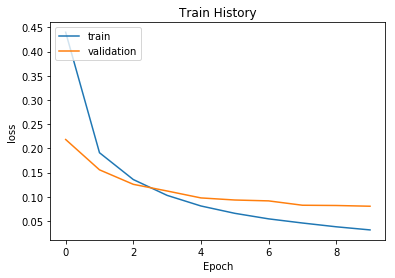

In [7]:
show_train_history(train_history,'loss','val_loss')

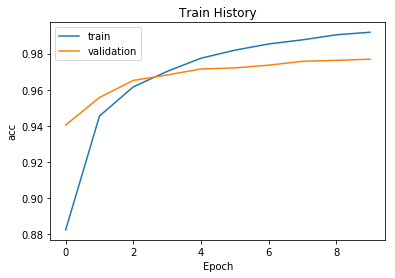

In [8]:
show_train_history(train_history,'acc','val_acc')

# 以测试数据评估模型的准确率

In [9]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
scores

10000/10000 [==============================] - 0s 19us/step


[0.07539093815232627, 0.976]

In [10]:
print('accuracy=',scores[1])

accuracy= 0.976


# 进行预测

In [11]:
prediction = model.predict(x_Test_normalize)
prediction

array([[7.0518973e-07, 1.6339412e-08, 1.9341483e-05, ..., 9.9899322e-01,
        4.5028123e-06, 9.5251653e-06],
       [4.3105173e-09, 9.2966911e-05, 9.9989617e-01, ..., 5.8698435e-15,
        5.1546124e-07, 1.3476206e-12],
       [1.2795115e-05, 9.9725145e-01, 6.2121107e-04, ..., 4.9239979e-04,
        1.4405533e-03, 1.0068347e-05],
       ...,
       [8.0437462e-12, 5.3984230e-11, 2.5985892e-11, ..., 3.7136044e-08,
        5.6933737e-07, 2.1638803e-06],
       [3.6415157e-10, 3.8914408e-10, 1.6150184e-11, ..., 1.7548875e-09,
        2.9670651e-05, 5.4903838e-11],
       [8.8138870e-07, 4.8084449e-12, 2.8938123e-08, ..., 5.5516081e-14,
        9.1402153e-10, 1.6485849e-10]], dtype=float32)

In [12]:
prediction = model.predict_classes(x_Test_normalize)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='gray')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

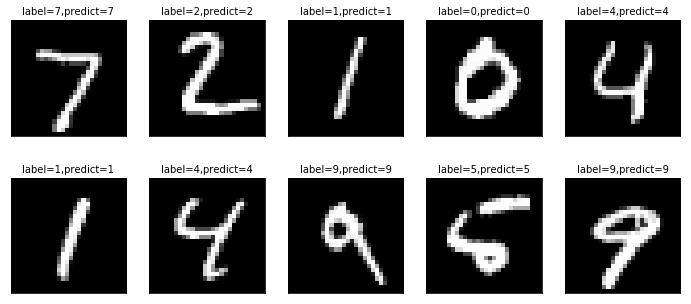

In [14]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# 显示混淆矩阵

In [15]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1009,0,2,0,2,4,8,1
3,0,0,5,988,0,3,0,4,6,4
4,1,0,5,1,962,0,3,0,3,7
5,3,0,0,13,1,856,7,1,8,3
6,5,3,3,1,4,3,937,0,2,0
7,0,5,13,6,1,0,0,990,5,8
8,5,0,3,5,3,2,1,2,952,1


In [16]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [19]:
df[(df.label==4)&(df.predict==6)]

,label,predict
1112,4,6
1178,4,6
3780,4,6


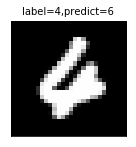

In [20]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1112,num=1)

In [21]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


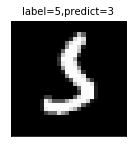

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

# 隐藏层增加为1000个神经元


In [23]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
#将“输入层”与“隐藏层”加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#将“输出层”加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

# 训练模型
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.2944 - acc: 0.9152 - val_loss: 0.1526 - val_acc: 0.9562
Epoch 2/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.1180 - acc: 0.9660 - val_loss: 0.1078 - val_acc: 0.9685
Epoch 3/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0760 - acc: 0.9783 - val_loss: 0.0929 - val_acc: 0.9728
Epoch 4/10
48000/48000 [==============================] - 4s 85us/

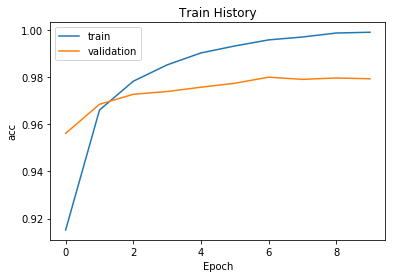

In [24]:
# 以图形显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')

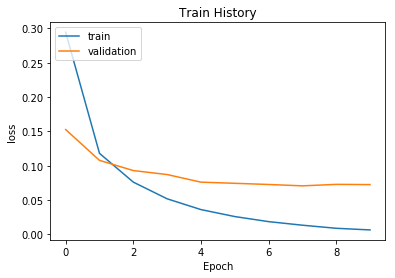

In [25]:
show_train_history(train_history,'loss','val_loss')

In [26]:
# 评估模型的准确率  原来的是accuracy= 0.9766
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 57us/step

accuracy= 0.9803


# 多层感知器加入DropOut功能以避免过度拟合


In [29]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
#将“输入层”与“隐藏层”加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.5))
#将“输出层”加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

# 训练模型
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48

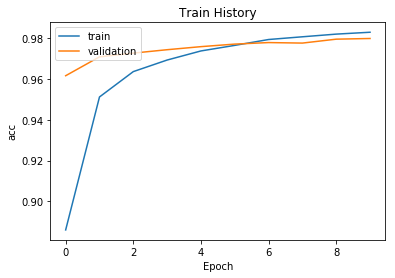

In [30]:
# 以图形显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')


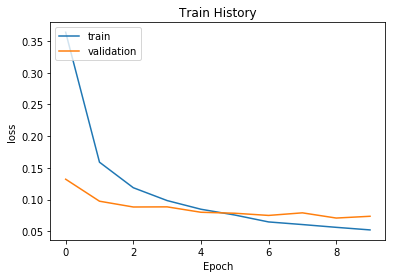

In [31]:
show_train_history(train_history,'loss','val_loss')

In [32]:
# 评估模型的准确率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 116us/step

accuracy= 0.9807
